**Today Let's try to implement PCA**

We will start off by loading a simple data set and then performing some simple approaches to selecting features

In [1]:
from sklearn.datasets import load_linnerud
linnerud_data = load_linnerud()
        
D = linnerud_data['data']

**Info about the features**

In [2]:
linnerud_data['feature_names']

['Chins', 'Situps', 'Jumps']

This dataset is generally used for linear regression, but it is fine for this exersice.

In [3]:
D = linnerud_data['data']
D.shape

(20, 3)

In [4]:
D

array([[  5., 162.,  60.],
       [  2., 110.,  60.],
       [ 12., 101., 101.],
       [ 12., 105.,  37.],
       [ 13., 155.,  58.],
       [  4., 101.,  42.],
       [  8., 101.,  38.],
       [  6., 125.,  40.],
       [ 15., 200.,  40.],
       [ 17., 251., 250.],
       [ 17., 120.,  38.],
       [ 13., 210., 115.],
       [ 14., 215., 105.],
       [  1.,  50.,  50.],
       [  6.,  70.,  31.],
       [ 12., 210., 120.],
       [  4.,  60.,  25.],
       [ 11., 230.,  80.],
       [ 15., 225.,  73.],
       [  2., 110.,  43.]])

We saw that one way we can quantify the useful featuers of our data is by variance. So, let's look at the estimated covariance matrix.

In [5]:
import numpy as np
np.cov(D.T, ddof=1) # np.cov requires attributes to be in rows.

array([[  27.94473684,  230.10789474,  134.38421053],
       [ 230.10789474, 3914.57631579, 2146.98421053],
       [ 134.38421053, 2146.98421053, 2629.37894737]])

Okay! so let us try to keep only the meaningfull attributes. (This is one way of selecting the features).

How about selecting 100 as the variance threshold.

In [6]:
from sklearn.feature_selection import VarianceThreshold

threshold = 100
feature_selector = VarianceThreshold(threshold=threshold)
feature_selector.fit_transform(D)

array([[162.,  60.],
       [110.,  60.],
       [101., 101.],
       [105.,  37.],
       [155.,  58.],
       [101.,  42.],
       [101.,  38.],
       [125.,  40.],
       [200.,  40.],
       [251., 250.],
       [120.,  38.],
       [210., 115.],
       [215., 105.],
       [ 50.,  50.],
       [ 70.,  31.],
       [210., 120.],
       [ 60.,  25.],
       [230.,  80.],
       [225.,  73.],
       [110.,  43.]])

But we did not range normalize the data, maybe if we did that first we may have selected some other set of features.

**Let's try to min-max scale our data. you can something like following.**

In [7]:
from sklearn.preprocessing import MinMaxScaler
D_normalized = MinMaxScaler().fit_transform(D)
D_normalized

array([[0.25      , 0.55721393, 0.15555556],
       [0.0625    , 0.29850746, 0.15555556],
       [0.6875    , 0.25373134, 0.33777778],
       [0.6875    , 0.27363184, 0.05333333],
       [0.75      , 0.52238806, 0.14666667],
       [0.1875    , 0.25373134, 0.07555556],
       [0.4375    , 0.25373134, 0.05777778],
       [0.3125    , 0.37313433, 0.06666667],
       [0.875     , 0.74626866, 0.06666667],
       [1.        , 1.        , 1.        ],
       [1.        , 0.34825871, 0.05777778],
       [0.75      , 0.7960199 , 0.4       ],
       [0.8125    , 0.82089552, 0.35555556],
       [0.        , 0.        , 0.11111111],
       [0.3125    , 0.09950249, 0.02666667],
       [0.6875    , 0.7960199 , 0.42222222],
       [0.1875    , 0.04975124, 0.        ],
       [0.625     , 0.89552239, 0.24444444],
       [0.875     , 0.87064677, 0.21333333],
       [0.0625    , 0.29850746, 0.08      ]])

Now let's try to calculate the covariance matrix again.

In [8]:
import numpy as np
np.cov(D_normalized.T, ddof=1)

array([[0.10915913, 0.07155096, 0.03732895],
       [0.07155096, 0.09689306, 0.04747339],
       [0.03732895, 0.04747339, 0.05193835]])

Let's try Variance threshold with 0.6 threshold

In [9]:
threshold = .06
feature_selector = VarianceThreshold(threshold=threshold)
feature_selector.fit_transform(D_normalized)

array([[0.25      , 0.55721393],
       [0.0625    , 0.29850746],
       [0.6875    , 0.25373134],
       [0.6875    , 0.27363184],
       [0.75      , 0.52238806],
       [0.1875    , 0.25373134],
       [0.4375    , 0.25373134],
       [0.3125    , 0.37313433],
       [0.875     , 0.74626866],
       [1.        , 1.        ],
       [1.        , 0.34825871],
       [0.75      , 0.7960199 ],
       [0.8125    , 0.82089552],
       [0.        , 0.        ],
       [0.3125    , 0.09950249],
       [0.6875    , 0.7960199 ],
       [0.1875    , 0.04975124],
       [0.625     , 0.89552239],
       [0.875     , 0.87064677],
       [0.0625    , 0.29850746]])

**Point of this exercise was for you to understand that when dealing with variance scale of the data matters.**

Text(0, 0.5, 'X2 of the range normalized')

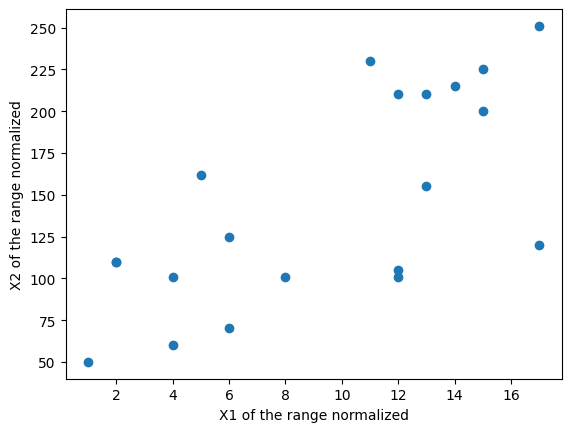

In [10]:
import matplotlib.pyplot as plt
plt.scatter(D[:,0], D[:,1])
# plt.scatter(D_normalized[:, 0], D_normalized[:, 1], color='r')
plt.xlabel('X1 of the range normalized')
plt.ylabel('X2 of the range normalized')

Text(0, 0.5, 'X2 of the range normalized')

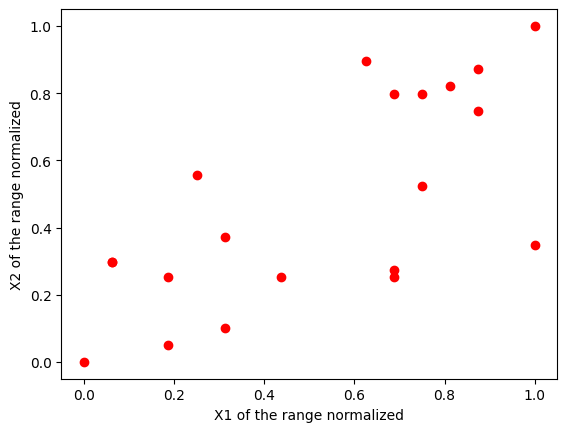

In [11]:
import matplotlib.pyplot as plt
# plt.scatter(D[:,0], D[:,1])
plt.scatter(D_normalized[:, 0], D_normalized[:, 1], color='r')
plt.xlabel('X1 of the range normalized')
plt.ylabel('X2 of the range normalized')

**PCA algorithm**

We are going to code PCA algorithm.

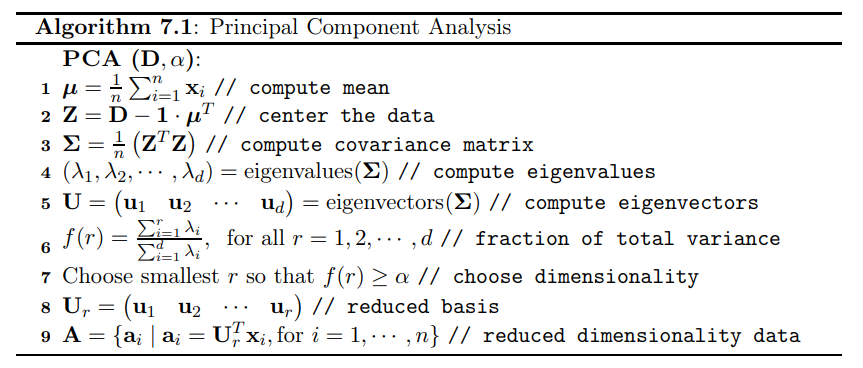

In [12]:
from sklearn.datasets import load_iris
D_iris = load_iris()['data']

In [13]:
D_iris.shape

(150, 4)

In [14]:
D = D_iris[:, 1:3]
D

array([[3.5, 1.4],
       [3. , 1.4],
       [3.2, 1.3],
       [3.1, 1.5],
       [3.6, 1.4],
       [3.9, 1.7],
       [3.4, 1.4],
       [3.4, 1.5],
       [2.9, 1.4],
       [3.1, 1.5],
       [3.7, 1.5],
       [3.4, 1.6],
       [3. , 1.4],
       [3. , 1.1],
       [4. , 1.2],
       [4.4, 1.5],
       [3.9, 1.3],
       [3.5, 1.4],
       [3.8, 1.7],
       [3.8, 1.5],
       [3.4, 1.7],
       [3.7, 1.5],
       [3.6, 1. ],
       [3.3, 1.7],
       [3.4, 1.9],
       [3. , 1.6],
       [3.4, 1.6],
       [3.5, 1.5],
       [3.4, 1.4],
       [3.2, 1.6],
       [3.1, 1.6],
       [3.4, 1.5],
       [4.1, 1.5],
       [4.2, 1.4],
       [3.1, 1.5],
       [3.2, 1.2],
       [3.5, 1.3],
       [3.6, 1.4],
       [3. , 1.3],
       [3.4, 1.5],
       [3.5, 1.3],
       [2.3, 1.3],
       [3.2, 1.3],
       [3.5, 1.6],
       [3.8, 1.9],
       [3. , 1.4],
       [3.8, 1.6],
       [3.2, 1.4],
       [3.7, 1.5],
       [3.3, 1.4],
       [3.2, 4.7],
       [3.2, 4.5],
       [3.1,

Text(0.5, 1.0, 'Scatter plot of data matrix D_iris')

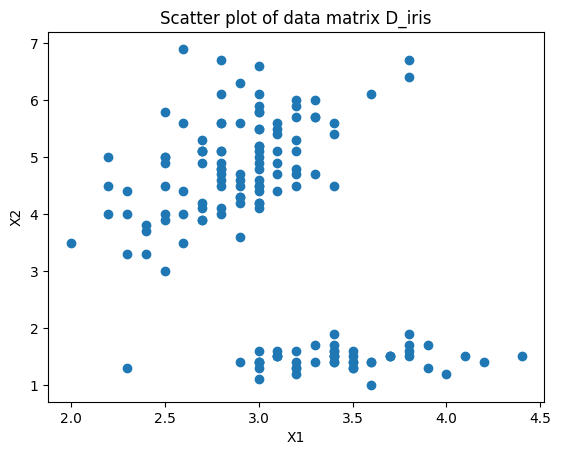

In [15]:
import matplotlib.pyplot as plt
plt.scatter(D[:,0], D[:,1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of data matrix D_iris')

**Let's do some mean centering**

**Calculate the mult-dimensional mean**

In [16]:
multi_d_mean = np.mean(D, axis=0)
multi_d_mean

array([3.05733333, 3.758     ])

**Do the mean centering**

In [17]:
centered_data = D - multi_d_mean
centered_data

array([[ 0.44266667, -2.358     ],
       [-0.05733333, -2.358     ],
       [ 0.14266667, -2.458     ],
       [ 0.04266667, -2.258     ],
       [ 0.54266667, -2.358     ],
       [ 0.84266667, -2.058     ],
       [ 0.34266667, -2.358     ],
       [ 0.34266667, -2.258     ],
       [-0.15733333, -2.358     ],
       [ 0.04266667, -2.258     ],
       [ 0.64266667, -2.258     ],
       [ 0.34266667, -2.158     ],
       [-0.05733333, -2.358     ],
       [-0.05733333, -2.658     ],
       [ 0.94266667, -2.558     ],
       [ 1.34266667, -2.258     ],
       [ 0.84266667, -2.458     ],
       [ 0.44266667, -2.358     ],
       [ 0.74266667, -2.058     ],
       [ 0.74266667, -2.258     ],
       [ 0.34266667, -2.058     ],
       [ 0.64266667, -2.258     ],
       [ 0.54266667, -2.758     ],
       [ 0.24266667, -2.058     ],
       [ 0.34266667, -1.858     ],
       [-0.05733333, -2.158     ],
       [ 0.34266667, -2.158     ],
       [ 0.44266667, -2.258     ],
       [ 0.34266667,

**Let's try to plot the original data and the mean centered data.**

Text(0.5, 1.0, 'Scatter plot of centered and original data')

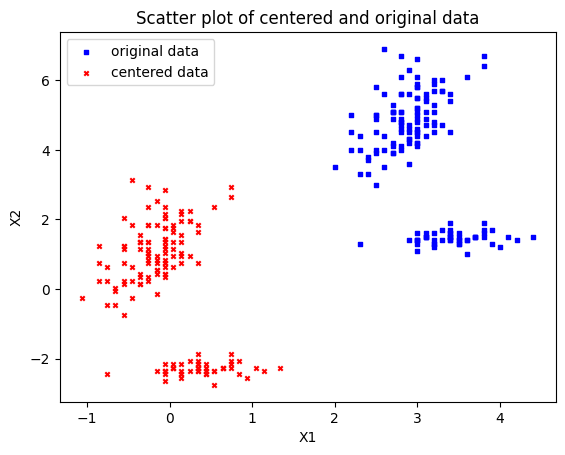

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111) # short hand for creating a single subplot
ax.scatter(D[:,0], D[:,1], s=10, c='b', marker='s', label='original data')
ax.scatter(centered_data[:,0], centered_data[:,1], s=10, c='r', marker='x', label='centered data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.title('Scatter plot of centered and original data')

**Let's try to calculate the multi-dimensional mean of the mean centered data**

In [19]:
np.mean(centered_data, axis = 0)

array([-7.60872846e-16, -2.55203266e-15])

That is numerically zero!!!

Linearly Transorming Data

Next, let's recall linear transforamtions as a rotaton and a scaling. Let's pick an arbitrary linear transormation and move some points around.

In [20]:
A = np.array([[2,1],[1,-1]])
A

array([[ 2,  1],
       [ 1, -1]])

In [21]:
D[0,:]

array([3.5, 1.4])

In [22]:
A.dot(D[0,:])  # numpy consider D[0,:] as a column vector

array([8.4, 2.1])

In [23]:
D[1,:]

array([3. , 1.4])

In [24]:
A.dot(D[1,:])

array([7.4, 1.6])

Great! So let's transform all the data in one go!

In [25]:
linearly_transformed_data = A.dot(D.T) # little bit weird that we have to take the transpose here.
linearly_transformed_data.T

array([[ 8.4,  2.1],
       [ 7.4,  1.6],
       [ 7.7,  1.9],
       [ 7.7,  1.6],
       [ 8.6,  2.2],
       [ 9.5,  2.2],
       [ 8.2,  2. ],
       [ 8.3,  1.9],
       [ 7.2,  1.5],
       [ 7.7,  1.6],
       [ 8.9,  2.2],
       [ 8.4,  1.8],
       [ 7.4,  1.6],
       [ 7.1,  1.9],
       [ 9.2,  2.8],
       [10.3,  2.9],
       [ 9.1,  2.6],
       [ 8.4,  2.1],
       [ 9.3,  2.1],
       [ 9.1,  2.3],
       [ 8.5,  1.7],
       [ 8.9,  2.2],
       [ 8.2,  2.6],
       [ 8.3,  1.6],
       [ 8.7,  1.5],
       [ 7.6,  1.4],
       [ 8.4,  1.8],
       [ 8.5,  2. ],
       [ 8.2,  2. ],
       [ 8. ,  1.6],
       [ 7.8,  1.5],
       [ 8.3,  1.9],
       [ 9.7,  2.6],
       [ 9.8,  2.8],
       [ 7.7,  1.6],
       [ 7.6,  2. ],
       [ 8.3,  2.2],
       [ 8.6,  2.2],
       [ 7.3,  1.7],
       [ 8.3,  1.9],
       [ 8.3,  2.2],
       [ 5.9,  1. ],
       [ 7.7,  1.9],
       [ 8.6,  1.9],
       [ 9.5,  1.9],
       [ 7.4,  1.6],
       [ 9.2,  2.2],
       [ 7.8,

In [26]:
D

array([[3.5, 1.4],
       [3. , 1.4],
       [3.2, 1.3],
       [3.1, 1.5],
       [3.6, 1.4],
       [3.9, 1.7],
       [3.4, 1.4],
       [3.4, 1.5],
       [2.9, 1.4],
       [3.1, 1.5],
       [3.7, 1.5],
       [3.4, 1.6],
       [3. , 1.4],
       [3. , 1.1],
       [4. , 1.2],
       [4.4, 1.5],
       [3.9, 1.3],
       [3.5, 1.4],
       [3.8, 1.7],
       [3.8, 1.5],
       [3.4, 1.7],
       [3.7, 1.5],
       [3.6, 1. ],
       [3.3, 1.7],
       [3.4, 1.9],
       [3. , 1.6],
       [3.4, 1.6],
       [3.5, 1.5],
       [3.4, 1.4],
       [3.2, 1.6],
       [3.1, 1.6],
       [3.4, 1.5],
       [4.1, 1.5],
       [4.2, 1.4],
       [3.1, 1.5],
       [3.2, 1.2],
       [3.5, 1.3],
       [3.6, 1.4],
       [3. , 1.3],
       [3.4, 1.5],
       [3.5, 1.3],
       [2.3, 1.3],
       [3.2, 1.3],
       [3.5, 1.6],
       [3.8, 1.9],
       [3. , 1.4],
       [3.8, 1.6],
       [3.2, 1.4],
       [3.7, 1.5],
       [3.3, 1.4],
       [3.2, 4.7],
       [3.2, 4.5],
       [3.1,

Text(0.5, 1.0, 'Scatter plot of original data and linearly transformed data')

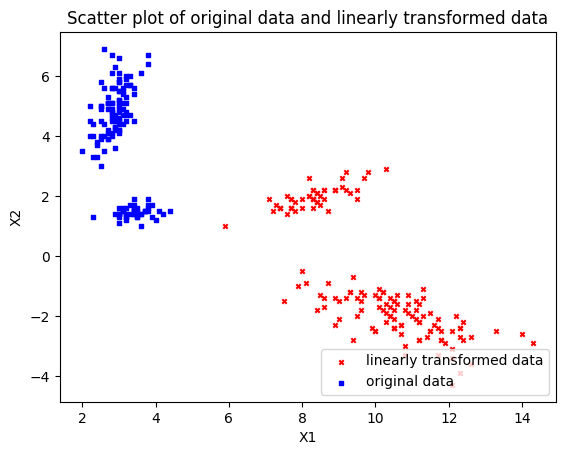

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(linearly_transformed_data[0,:], linearly_transformed_data[1,:], s=10, c='r', marker='x', label='linearly transformed data')
ax.scatter(D[:,0], D[:,1], s=10, c='b', marker='s', label='original data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='lower right')
plt.title('Scatter plot of original data and linearly transformed data')

**Let's do a small exercise.**

Here I defined the rotation matrix for 2D plane. If you use this linear transformation, you can rotate the points by theta angle.

Apply the linear transformation and plot them against the original data points.

In [28]:
angle = 45
angle_in_radians = np.radians(angle)
cos_theta = np.sin(angle_in_radians)
sin_theta = np.cos(angle_in_radians)
B = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
B

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Text(0.5, 1.0, 'Scatter plot of original data and linearly transformed data')

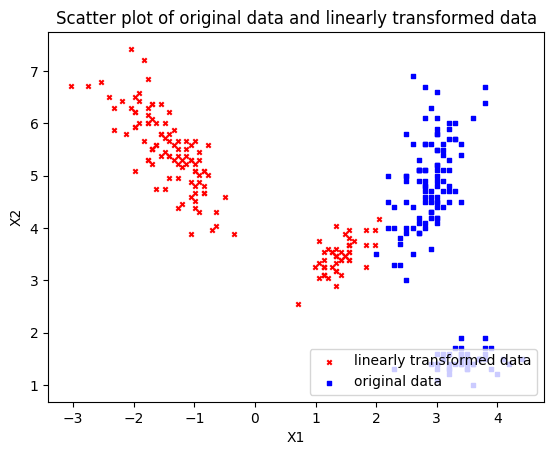

In [29]:
# Exercise
linearly_transformed_data_rotate = B.dot(D.T) # little bit weird that we have to take the transpose here.
linearly_transformed_data_rotate.T

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(linearly_transformed_data_rotate[0,:], linearly_transformed_data_rotate[1,:], s=10, c='r', marker='x', label='linearly transformed data')
ax.scatter(D[:,0], D[:,1], s=10, c='b', marker='s', label='original data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='lower right')
plt.title('Scatter plot of original data and linearly transformed data')

**Now let's get back to PCA**

In [ ]:
Sigma = np.cov(D.T, ddof=1)
Sigma

Or, we an compute it the way we saw in the notes:

In [ ]:
n = D.shape[0]
1/(n-1)*np.dot(centered_data.T, centered_data)

They are the same.

**Eigenvalues**

Next up is one of the major steps, we will get the eigenvalues and engenvectors of the covariance matrix

In [ ]:
import numpy.linalg as LA
evalues, evectors = LA.eig(Sigma)

In [ ]:
evalues

In [ ]:
evectors

Note that in class, and the algorithm, the eigenvalues (and corresponding vectors) were assumed to be sorted in decending order by eigenvalue. Numpy does not do that, so let's sort them!

In [ ]:
idx = evalues.argsort()[::-1] # evalues.argsort() returns the indices that would sort the evalues array in ascending order.
print(idx)
evalues = evalues[idx]
evectors = evectors[:, idx]

**Now they are sorted in decending order by eigenvalue**

In [ ]:
print(evalues)
print(evectors)

**Recall that the sum of the eigenvalues is the total variance of the dataset. That is**

In [ ]:
total_var = sum(np.diag(Sigma))
total_var

In [ ]:
sum(evalues)

And, we can find the proportion of the total variance attributred to each eigenvector. For example, in just the direction of the largest eigenvalues, we capture over 95% of the total variance:

In [ ]:
evalues[0]/total_var

Let's project our data on to the largest eigenvector.

In [ ]:
coords_along_eig0 = evectors[:,0].T.dot(centered_data.T)
coords_along_eig0

We have one dimensional representation of our dataset.

In [ ]:
coords_along_eig0.shape

It can be helpful to visuzlize the data projected on to the eigenvector. Below, we plot the centered data in blue and the projected data in red

In [ ]:
coords_along_eig0 = evectors[:,0].T.dot(centered_data.T)

projected_along_eig0 = np.zeros((n,2))
for i in range(len(coords_along_eig0)):
    projected_along_eig0[i,:] = coords_along_eig0[i]*evectors[:,0]

pjdev0 = projected_along_eig0
# plot of centered data and its projection onto the first principial component (evec corresponding to largest eval)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(centered_data[:,0], centered_data[:,1], s=10, c='b', marker='s', label='centered data')
ax.scatter(pjdev0[:,0], pjdev0[:,1], s=10, c='r', marker='x', label='1-dimensional pca-transformed data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend(loc='upper left')
plt.title('Scatter plot of centered and PCA-transformed data')

what happens if we use the other eigenvector?

In [ ]:
coords_along_eig1 = evectors[:,1].T.dot(centered_data.T)

projected_along_eig1 = np.zeros((n,2))
for i in range(len(coords_along_eig1)):
    projected_along_eig1[i,:] = coords_along_eig1[i]*evectors[:,1]

pjdev1 = projected_along_eig1
# plot of centered data and its projection onto the first principial component (evec corresponding to largest eval)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(centered_data[:,0], centered_data[:,1], s=10, c='b', marker='s', label='centered data')
ax.scatter(pjdev0[:,0], pjdev0[:,1], s=10, c='r', marker='x', label='1-dimensional pca-transformed data')
ax.scatter(pjdev1[:,0], pjdev1[:,1], s=10, c='c', marker='x', label='1-dimensional transformed data onto evec 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend(loc='upper left')
plt.title('Scatter plot of centered and PCA-transformed data')

In [ ]:
coords_in_evec_axes = evectors.T.dot(centered_data.T)
coords_in_evec_axes.shape

In [ ]:
plt.scatter(coords_in_evec_axes[0,:], coords_in_evec_axes[1,:])
plt.xlabel('PC1 (evec corresponding to largest eval of Sigma) ')
plt.ylabel('PC2 (evec corresponding to second largest eval of Sigma) ')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title('scatter plot of transformed data with eigenvectors as axes')

But we do not have to implement this algorithm by hand. It's already in the standard libraries.

Following is one of the implementations in scikit-learn!!!

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed_D = pca.fit_transform(D)

After we run PCA, we can get some info about what the decomposition did:

In [ ]:
pca.explained_variance_ratio_

What does this mean?

Those are the propotion of the variance in the direction of each principal component.

In [ ]:
print(evalues[0] / sum(evalues))
print(evalues[1] / sum(evalues))

**We can also get the eigenvectors:**

In [ ]:
pca.components_ 

**Remember that the eigenvectors are listed row wise in decreasing order of eigenvalues magnitude. So we have :**

- 0th eigenvector is [-0.11057628,  0.99386764]
- 1st eigenvector is [0.99386764,  0.11057628]

We can compare with our previous eigenvectos:

In [ ]:
evectors

Eigenvectors we calculated earlier is listed column wise. Recall that they are also in decreasing order of the magnitude.


- 0th eigenvector is [0.11057628,  -0.99386764]
- 1st eigenvector is [-0.99386764,  -0.11057628]

There is a small **difference** in the eigenvectors we calculated and the scikit-learn implementations answer.

The eigenvectors are facing the opposite directions. But this is fine.

0th eigenvector maximizes the variance. Obviously its opposite direction also maximizes the variance. 

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(coords_in_evec_axes[0,:], coords_in_evec_axes[1,:], s=10, c='b', marker='s', label='transformed data using pca')
ax.scatter(pca_transformed_D[:,0], pca_transformed_D[:,1], s=10, c='r', marker='x', label='transformed data using sklearn PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend(loc='lower right')
plt.title('Scatter plot of centered and sklearn PCA-transformed data using 2 principal components')

So, we can see that the blue points and the red points are reflectison of eachother. That is becuase the directions we projected on to are the opposite of the directions that sklearn projected on to. To use the same directions, just multiply each coordinate by -1

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(-1*coords_in_evec_axes[0,:], -1*coords_in_evec_axes[1,:], s=10, c='b', marker='s', label='transformed data using pca')
ax.scatter(pca_transformed_D[:,0], pca_transformed_D[:,1], s=10, c='r', marker='x', label='transformed data using sklearn PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend(loc='lower right')
plt.title('Scatter plot of centered and sklearn PCA-transformed data using 2 principal components')

Another thing that I mentioned in the lecture was that when we have the transformed points, we have a representation in which varaince in each direction is independent. Let's look that now.

In [ ]:
np.cov(coords_in_evec_axes)

Look at the **off diagonal**.

They are basically zero.

**Let's work on a real dataset.**

Maybe we can pick something with more than 3 dimensions to make it more interesting.

The iris dataset orignally had 4 attributes, but we only used 2 of them for the previous examples. Now let's use all of them.

In [ ]:
D_iris = load_iris()['data']
pca = PCA(n_components=2)
pca_transformed_D_iris = pca.fit_transform(D_iris)
pca.explained_variance_ratio_

In [ ]:
D_iris.shape

In [ ]:
pca_transformed_D_iris.shape

In [ ]:
plt.scatter(pca_transformed_D_iris[:, 0], pca_transformed_D_iris[:, 1])
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('PCA-transformed iris data using 2 principal components')